Predicción de aprobación de crédito con SVM


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [73]:
# Paso 1: Cargar datos
df = pd.read_csv('data.csv')


In [128]:
# Mostrar primeras filas para análisis
display(df.head())

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,1,30,3748,93.0,5,3500.0,NaN,0.00,214,14,4,3
1,0,18,1,32,4598,9.0,12,900.0,1824.67,1933.75,175,12,1,2
2,0,0,1,26,5148,8.0,2,2400.0,2797.38,188.29,187,14,0,3
3,0,0,1,36,5179,20.0,12,2700.0,NaN,0.00,187,1,0,2
4,0,0,1,46,3960,NaN,1,3100.0,2000.00,11010.65,189,14,0,2


Paso 2: Convertir variables categóricas a numéricas
Convertimos las variables categóricas a numéricas usando LabelEncoder

In [133]:
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


Manejo de valores faltantes solo en columnas numéricas
Se usa la estrategia 'median' para rellenar valores faltantes en datos numéricos

In [136]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Paso 3: Análisis de correlación
Visualizamos la correlación entre variables para identificar redundancias

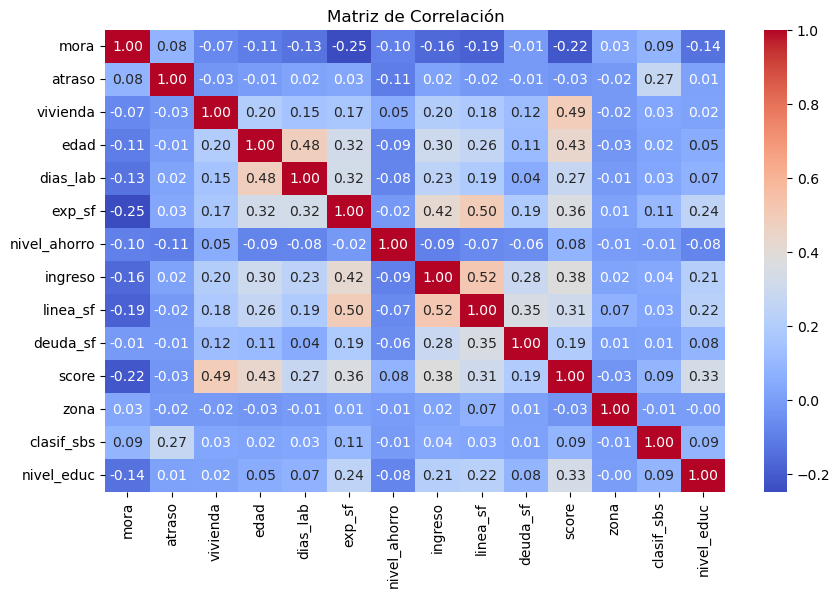

In [139]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Definir la columna objetivo como 'mora'
Esta es la variable que queremos predecir: si la persona tendrá dificultades para pagar el crédito

In [142]:

columna_target = 'mora'


In [97]:
# Separar variables predictoras y objetivo
X = df_imputed.drop(columns=[columna_target])
y = df_imputed[columna_target]

Paso 4: Normalización de los datos
Se estandarizan los datos para que todas las variables tengan la misma escala

In [145]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


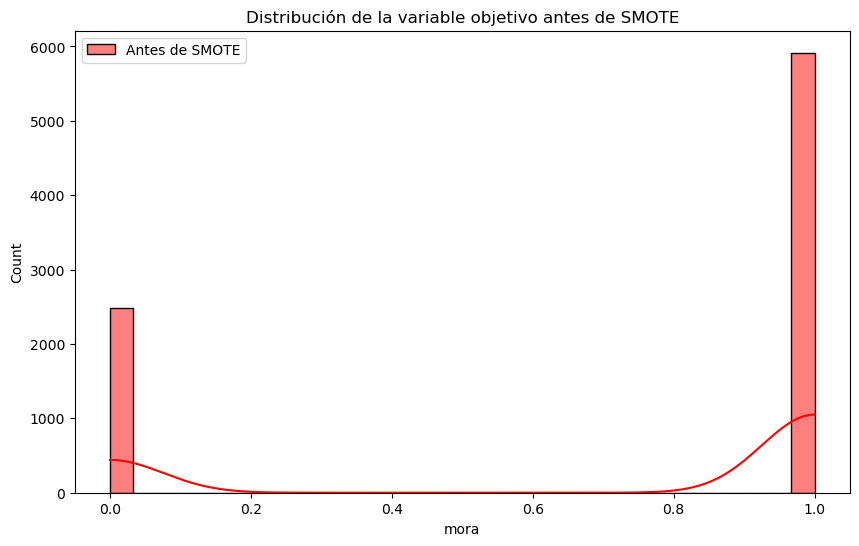

In [122]:
# Visualizar histograma antes del balanceo con colores diferenciados
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30, color='red', label='Antes de SMOTE')
plt.legend()
plt.title("Distribución de la variable objetivo antes de SMOTE")
plt.show()


Paso 5: Balanceo de clases con SMOTE
Se usa SMOTE para balancear las clases y evitar partiduras en el modelo

In [148]:

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)


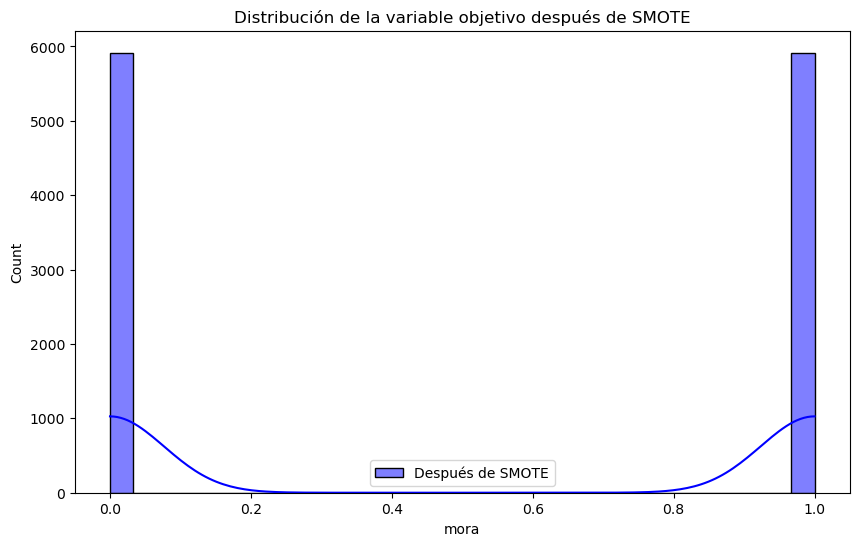

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(y_res, kde=True, bins=30, color='blue', label='Después de SMOTE')
plt.legend()
plt.title("Distribución de la variable objetivo después de SMOTE")
plt.show()


 Paso 6: División en entrenamiento y prueba
 Se divide el conjunto de datos en 80% entrenamiento y 20% prueba

In [151]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Paso 7: Entrenamiento del modelo SVM con distintos kernels; 

Probamos distintos kernels de SVM para ver cuál tiene mejor desempeño


In [155]:

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print(f"Entrenando modelo SVM con kernel: {kernel}")
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

Entrenando modelo SVM con kernel: linear
Entrenando modelo SVM con kernel: rbf
Entrenando modelo SVM con kernel: poly
Entrenando modelo SVM con kernel: sigmoid


Entrenando modelo SVM con kernel: linear
Precisión para kernel linear: 0.6703


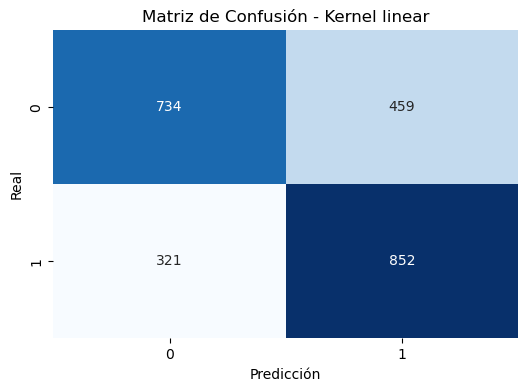


Reporte de Clasificación para kernel linear:


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.695735,0.649886,0.67033,0.672810,0.673004
recall,0.615256,0.726343,0.67033,0.670799,0.670330
f1-score,0.653025,0.685990,0.67033,0.669508,0.669368
support,1193.000000,1173.000000,0.67033,2366.000000,2366.000000


Entrenando modelo SVM con kernel: rbf
Precisión para kernel rbf: 0.7232


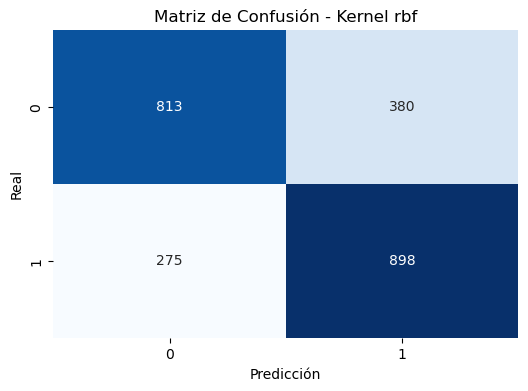


Reporte de Clasificación para kernel rbf:


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.747243,0.702660,0.723161,0.724952,0.725140
recall,0.681475,0.765558,0.723161,0.723517,0.723161
f1-score,0.712845,0.732762,0.723161,0.722804,0.722720
support,1193.000000,1173.000000,0.723161,2366.000000,2366.000000


Entrenando modelo SVM con kernel: poly
Precisión para kernel poly: 0.6970


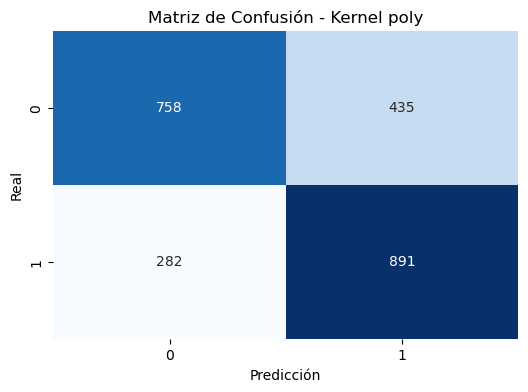


Reporte de Clasificación para kernel poly:


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.728846,0.671946,0.696957,0.700396,0.700636
recall,0.635373,0.759591,0.696957,0.697482,0.696957
f1-score,0.678907,0.713085,0.696957,0.695996,0.695852
support,1193.000000,1173.000000,0.696957,2366.000000,2366.000000


Entrenando modelo SVM con kernel: sigmoid
Precisión para kernel sigmoid: 0.5604


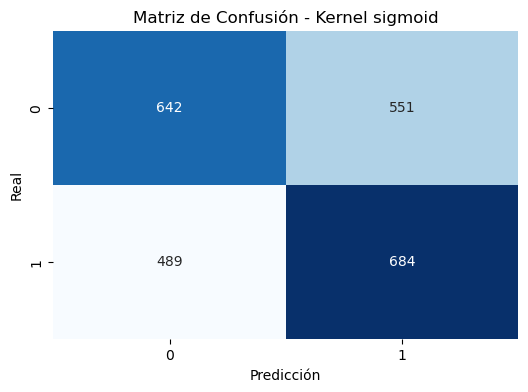


Reporte de Clasificación para kernel sigmoid:


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.567639,0.553846,0.56044,0.560743,0.560801
recall,0.538139,0.583120,0.56044,0.560630,0.560440
f1-score,0.552496,0.568106,0.56044,0.560301,0.560235
support,1193.000000,1173.000000,0.56044,2366.000000,2366.000000


In [157]:

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print(f"Entrenando modelo SVM con kernel: {kernel}")
    
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Predicciones
    y_pred = svm_model.predict(X_test)

    # Evaluación del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión para kernel {kernel}: {accuracy:.4f}")

    # Matriz de Confusión gráfica
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - Kernel {kernel}')
    plt.show()

    print(f"\nReporte de Clasificación para kernel {kernel}:")
    display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)))



Objetivo: Predecir si una persona tendrá dificultades para pagar un crédito.



 - La métrica de precisión nos indica qué tan bien está clasificando el modelo.
 - La matriz de confusión nos ayuda a ver los errores en predicciones de cada clase.
 - Podemos comparar los distintos kernels para elegir el que mejor se desempeñe.
 - Si la precisión es baja, se puede probar ajustar hiperparámetros con GridSearchCV.
 - También es recomendable probar otros modelos como Random Forest o XGBoost para comparar